# Analysis focuses on -

- Country: India
- Cities: Chennai, Delhi, Kolkata and Mumbai
- Pollutants: co, so3, o3, n02
- Date: June 22, 2020
- Cross sectional: June 22, 2017

In [2]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import io
import os
import csv
import requests
import json
#import pytz
#from datetime import datetime

In [3]:
# Setup Dataframe for each city from the data we retrieved from web
chennai_df = pd.read_csv('Main_Data_Retrieval/Chennai_data.csv')
delhi_df = pd.read_csv('Main_Data_Retrieval/Delhi_data.csv')
kolkata_df = pd.read_csv('Main_Data_Retrieval/Kolkata_data.csv')
mumbai_df = pd.read_csv('Main_Data_Retrieval/Mumbai_data.csv')


In [4]:
#Drop pm25 and pm10 for all cities
drop_parameter = ["pm25", "pm10"]

final_chennai_df = chennai_df[chennai_df["parameter"].isin(drop_parameter)==False]
final_delhi_df = delhi_df[delhi_df["parameter"].isin(drop_parameter)==False]
final_kolkata_df = kolkata_df[kolkata_df["parameter"].isin(drop_parameter)==False]
final_mumbai_df = mumbai_df[mumbai_df["parameter"].isin(drop_parameter)==False]

In [5]:
#Combined the data for each city in a single file
dfs = [final_chennai_df, final_delhi_df, final_kolkata_df, final_mumbai_df]
complete_city_df = pd.concat(dfs)
complete_city_df.head()

,Unnamed: 0,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
0,0,"Velachery Res. Area, Chennai - CPCB",Chennai,IN,2020-06-22T23:30:00.000Z,2020-06-23T05:00:00+05:30,no2,3.27,µg/m³,13.005219,80.239812,"[{""name"":""Central Pollution Control Board"",""ur..."
1,1,"Velachery Res. Area, Chennai - CPCB",Chennai,IN,2020-06-22T23:30:00.000Z,2020-06-23T05:00:00+05:30,so2,3.85,µg/m³,13.005219,80.239812,"[{""name"":""Central Pollution Control Board"",""ur..."
2,2,"Velachery Res. Area, Chennai - CPCB",Chennai,IN,2020-06-22T23:30:00.000Z,2020-06-23T05:00:00+05:30,o3,0.00,µg/m³,13.005219,80.239812,"[{""name"":""Central Pollution Control Board"",""ur..."
3,3,"Velachery Res. Area, Chennai - CPCB",Chennai,IN,2020-06-22T23:30:00.000Z,2020-06-23T05:00:00+05:30,co,1010.00,µg/m³,13.005219,80.239812,"[{""name"":""Central Pollution Control Board"",""ur..."
5,5,"Velachery Res. Area, Chennai - CPCB",Chennai,IN,2020-06-22T23:00:00.000Z,2020-06-23T04:30:00+05:30,no2,1.66,µg/m³,13.005219,80.239812,"[{""name"":""Central Pollution Control Board"",""ur..."


In [6]:
#Clean dataset by dropping various columns
final_df = complete_city_df.drop(["country","attribution","unit", "Unnamed: 0"], axis=1)
final_df.head()

,location,city,utc,local,parameter,value,latitude,longitude
0,"Velachery Res. Area, Chennai - CPCB",Chennai,2020-06-22T23:30:00.000Z,2020-06-23T05:00:00+05:30,no2,3.27,13.005219,80.239812
1,"Velachery Res. Area, Chennai - CPCB",Chennai,2020-06-22T23:30:00.000Z,2020-06-23T05:00:00+05:30,so2,3.85,13.005219,80.239812
2,"Velachery Res. Area, Chennai - CPCB",Chennai,2020-06-22T23:30:00.000Z,2020-06-23T05:00:00+05:30,o3,0.00,13.005219,80.239812
3,"Velachery Res. Area, Chennai - CPCB",Chennai,2020-06-22T23:30:00.000Z,2020-06-23T05:00:00+05:30,co,1010.00,13.005219,80.239812
5,"Velachery Res. Area, Chennai - CPCB",Chennai,2020-06-22T23:00:00.000Z,2020-06-23T04:30:00+05:30,no2,1.66,13.005219,80.239812


In [7]:
#final_df['utc'] =  pd.to_datetime(final_df['utc'], format='%Y-%m-%dT%H:%M:%S-%Z')

Test Dataframe with header 

Summary Table - 
**Cities:** Chennai, Delhi, Kolkota, Mumbai

*   **Cities:** Chennai, Delhi, Kolkota, Mumbai
*   **Statistical Distributions:**
Mean, Median, Range, Stvd, SEM, IQR 
*   **Pollutants (values)**: CO


* **Cross Sectional Dates: *** PreCOVID 2017 - EX: 6/22/2017
COVID Present - EX: 6/22/2020








In [8]:
df_co = final_df.loc[final_df['parameter'] == 'co']
df_co.head()

,location,city,utc,local,parameter,value,latitude,longitude
3,"Velachery Res. Area, Chennai - CPCB",Chennai,2020-06-22T23:30:00.000Z,2020-06-23T05:00:00+05:30,co,1010.0,13.005219,80.239812
6,"Velachery Res. Area, Chennai - CPCB",Chennai,2020-06-22T23:00:00.000Z,2020-06-23T04:30:00+05:30,co,1250.0,13.005219,80.239812
12,"Velachery Res. Area, Chennai - CPCB",Chennai,2020-06-22T22:45:00.000Z,2020-06-23T04:15:00+05:30,co,1170.0,13.005219,80.239812
15,"Velachery Res. Area, Chennai - CPCB",Chennai,2020-06-22T22:30:00.000Z,2020-06-23T04:00:00+05:30,co,1140.0,13.005219,80.239812
22,"Velachery Res. Area, Chennai - CPCB",Chennai,2020-06-22T21:15:00.000Z,2020-06-23T02:45:00+05:30,co,1140.0,13.005219,80.239812


In [9]:
 # If the data is in a dataframe, we use pandas to give quartile calculations pm25

grouped_cities_co_df = df_co.groupby(["city"])
# grouped_cities_df.head()


avg_value = grouped_cities_co_df["value"].mean()
# avg_value.head()


median_value = grouped_cities_co_df["value"].median()
# median_value.head()


var_value = grouped_cities_co_df["value"].var()
# var_value.head()
std_value = grouped_cities_co_df["value"].std()
# std_value.head()
sem_value = grouped_cities_co_df["value"].sem()
# sem_value.head()
 
citystats_co_df = pd.DataFrame({"Mean":avg_value, 
                                "Median":median_value,
                                "Standard Deviation": std_value, 
                                "Variance":var_value, 
                                "SEM":sem_value})

citystats_co_df.sort_values("city", axis=0, ascending = True)


,Mean,Median,Standard Deviation,Variance,SEM
city,,,,,
Chennai,1007.000000,990.0,120.398461,14495.789474,26.921914
Delhi,664.333333,440.0,376.047350,141411.609195,68.656539
Kolkata,263.636364,260.0,38.858161,1509.956710,8.284588
Mumbai,420.555556,420.0,87.209836,7605.555556,20.555556


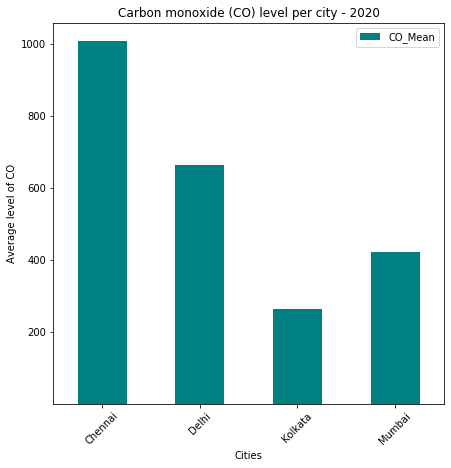

In [28]:
plt.figure(figsize=(7,7))

co_barplot = citystats_co_df["Mean"]
plt.bar(co_barplot.index.values, co_barplot.values, 
        color="teal",
        align="center", 
        width = 0.5)

# Set a Title and labels
plt.xlabel("Cities")
plt.xticks(rotation=45)
plt.ylabel("Average level of CO")
plt.title("Carbon monoxide (CO) level per city - 2020")
plt.legend(["CO_Mean"])

# Set x and y limits
plt.xlim(-0.5, 3.5)
plt.ylim(0.5)

plt.savefig("Main_output_images/CO_Mean_2020_barplot.png")

Calculate IQR for prep Box Plot 

In [11]:
#  IQR Min, Median, Max
# chennai 
df_co_chennai = chennai_df.loc[chennai_df['parameter'] == 'co']
df_co_chennai.head()

quartiles = df_co_chennai['value'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of co for Chennai is: {lowerq}")
print(f"The upper quartile of co for Chennai is: {upperq}")
print(f"The interquartile range of co for Chennai is: {iqr}")
print(f"The the median of pm25 is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Chennai - values below {lower_bound} could be outliers.")
print(f"Chennai - values above {upper_bound} could be outliers.")

#  delhi
df_co_delhi = delhi_df.loc[delhi_df['parameter'] == 'co']
df_co_delhi.head()

quartiles = df_co_delhi['value'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of co for Delhi is is: {lowerq}")
print(f"The upper quartile of co for Delhi is is: {upperq}")
print(f"The interquartile range of co for Delhi is is: {iqr}")
print(f"The the median of co for Delhi is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Delhi - values below {lower_bound} could be outliers.")
print(f"Delhi - values above {upper_bound} could be outliers.")

# kolkata
df_co_kolkata = kolkata_df.loc[kolkata_df['parameter'] == 'co']
df_co_kolkata.head()

quartiles = df_co_kolkata['value'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of co for Kolkata is: {lowerq}")
print(f"The upper quartile of co for Kolkata: {upperq}")
print(f"The interquartile range of co for Kolkata is: {iqr}")
print(f"The the median of co for Kolkata is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Kolkata - values below {lower_bound} could be outliers.")
print(f"Kolkata - values above {upper_bound} could be outliers.")

#  mummbai 
df_co_mumbai = mumbai_df.loc[mumbai_df['parameter'] == 'co']
df_co_mumbai.head()

quartiles = df_co_mumbai['value'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of co for Mumbai is: {lowerq}")
print(f"The upper quartile of co for Mumbai is: {upperq}")
print(f"The interquartile range of co for Mumbai is: {iqr}")
print(f"The the median of co for Mumbai is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Mumbai - values below {lower_bound} could be outliers.")
print(f"Mumbai - values above {upper_bound} could be outliers.")



The lower quartile of co for Chennai is: 930.0
The upper quartile of co for Chennai is: 1095.0
The interquartile range of co for Chennai is: 165.0
The the median of pm25 is: 990.0 
Chennai - values below 682.5 could be outliers.
Chennai - values above 1342.5 could be outliers.
The lower quartile of co for Delhi is is: 372.5
The upper quartile of co for Delhi is is: 1072.5
The interquartile range of co for Delhi is is: 700.0
The the median of co for Delhi is: 440.0 
Delhi - values below -677.5 could be outliers.
Delhi - values above 2122.5 could be outliers.
The lower quartile of co for Kolkata is: 260.0
The upper quartile of co for Kolkata: 287.5
The interquartile range of co for Kolkata is: 27.5
The the median of co for Kolkata is: 260.0 
Kolkata - values below 218.75 could be outliers.
Kolkata - values above 328.75 could be outliers.
The lower quartile of co for Mumbai is: 352.5
The upper quartile of co for Mumbai is: 497.5
The interquartile range of co for Mumbai is: 145.0
The the m

<Figure size 936x648 with 0 Axes>

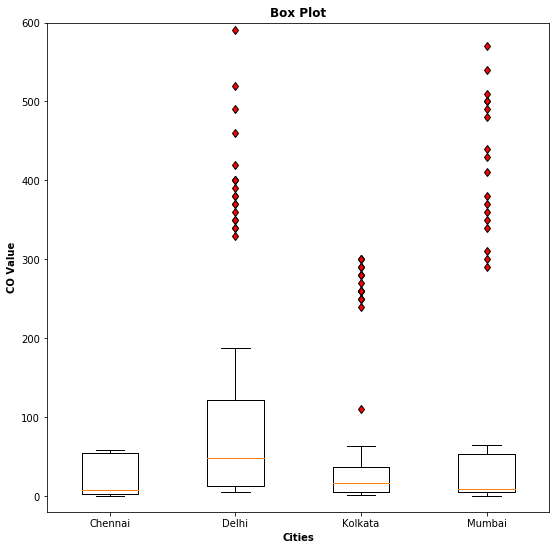

In [12]:
plt.figure(figsize=(13, 9))
plt.subplots(figsize=(9, 9))

#Create a list to use as labels and dataframe
ALL_FOUR = ["Chennai", "Delhi", "Kolkata", "Mumbai"]
flierprops = dict(marker='d', markeredgecolor='k', markerfacecolor= "r")


# Title and Labels         
plt.boxplot([chennai_df["value"], delhi_df["value"], kolkata_df["value"], mumbai_df["value"]], 
            flierprops=flierprops, labels= ALL_FOUR)


plt.title("Box Plot", fontweight= "bold")
plt.xlabel("Cities", fontweight= "bold")
plt.ylabel("CO Value", fontweight= "bold")

plt.ylim(-20, 600)
plt.ylim(-20, 600)


plt.savefig("Main_output_images/CO_BoxPlot.png")

plt.show()


Box Plot of CO (y-axis) in each city (x-axis) on 6/22/2020 


Pie Chart the average pollutants (NO2, SO2, CO, O3 ) in each city



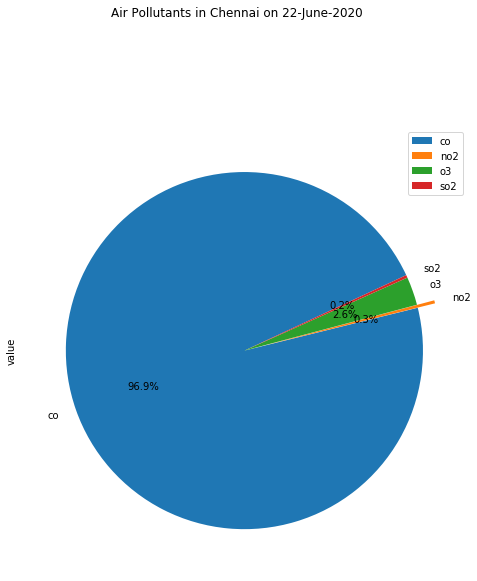

In [13]:
chennai_pie = final_chennai_df.groupby(["parameter"])
chennai_mean_plot = chennai_pie.value.mean()

explode = (0, 0.1, 0, 0)
chennai_mean_plot.plot(kind="pie", 
                       subplots=True, 
                       title="Air Pollutants in Chennai on 22-June-2020", 
                       autopct="%1.1f%%",
                       figsize=(8,10),
                       startangle=25,
                       explode=explode,
#                        shadow=True,
                       legend=True)

plt.savefig("Main_output_images/Chennai_2020_Pi.png")

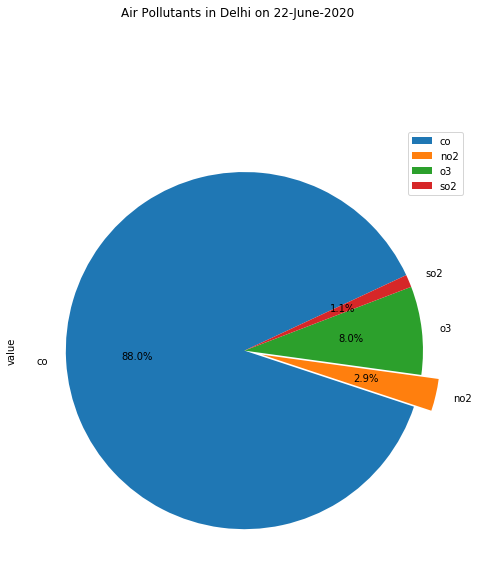

In [14]:
delhi_pie = final_delhi_df.groupby(["parameter"])
delhi_mean_plot = delhi_pie.value.mean()
explode = (0, 0.1, 0, 0)
delhi_mean_plot.plot(kind="pie", 
                     subplots=True, 
                     title="Air Pollutants in Delhi on 22-June-2020",
                     startangle=25,
                     autopct="%1.1f%%", 
                     figsize=(8,10), 
                     explode=explode, 
                     legend=True)

plt.savefig("Main_output_images/Delhi_2020_Pi.png")

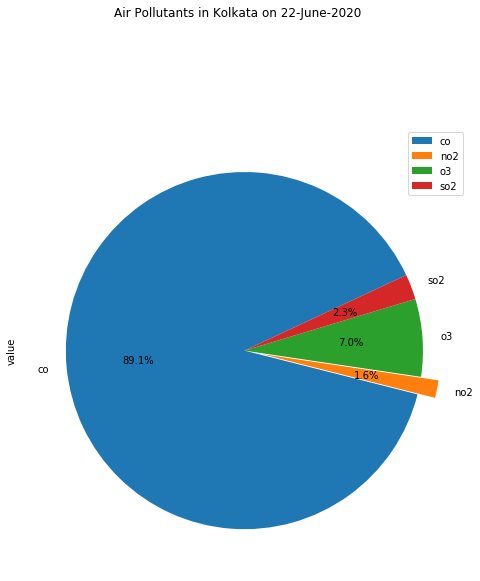

In [15]:
kolkata_pie = final_kolkata_df.groupby(["parameter"])
kolkata_mean_plot = kolkata_pie.value.mean()
explode = (0, 0.1, 0, 0)
kolkata_mean_plot.plot(kind="pie", 
                       subplots=True, 
                       title="Air Pollutants in Kolkata on 22-June-2020", 
                       startangle=25,
                       autopct="%1.1f%%",
                       figsize=(8,10), 
                       explode=explode, 
                       legend=True)

plt.savefig("Main_output_images/Kolkata_2020_Pi.png")

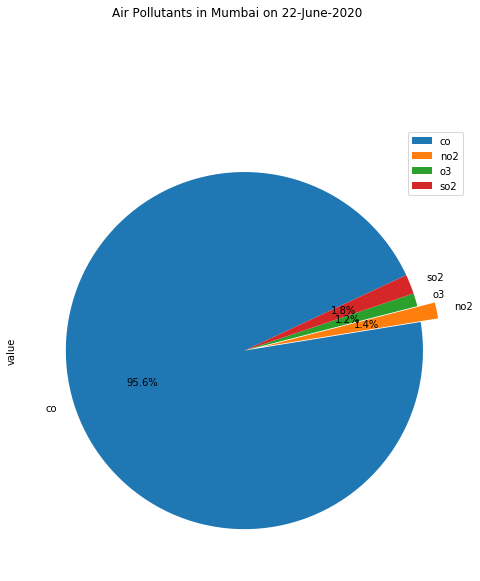

In [16]:
mumbai_pie = final_mumbai_df.groupby(["parameter"])
mumbai_mean_plot = mumbai_pie.value.mean()
explode = (0, 0.1, 0, 0)
mumbai_mean_plot.plot(kind="pie", 
                      subplots=True, 
                      title="Air Pollutants in Mumbai on 22-June-2020", 
                      autopct="%1.1f%%",
                      startangle=25,
                      figsize=(8,10), 
                      explode=explode, 
                      legend=True)

plt.savefig("Main_output_images/Mumbai_2020_Pi.png")

# Cross Sectional Analysis

Scatter Plot [Group selected city]'s PM25 levels throughout day 


*  **Date:** [*Group selected date with sufficient PM25 datapoint]*
*  **Determine time range for parts of day:** Morning [time range EX 12:00 am - 7:59 am?], Midday [time range EX 8:00 am- 3:59 pm], Evening [time range EX 4:00pm -11:59pm]
*  **Axis:** X-value: time; y-value: mean PM25 within time of day







In [17]:
#For Cross Sectional Analysis
#Chennai location center: IIT
#Chennai coordinates: 12.99,80.23
#Delhi location center: NSIT Dwarka
#Delhi coordinate: 28.59,77.05
#Kolkata location center: Rabindra Bharati University, Kolkata - WBSPCB
#Kolkata coordinates: 22.62,88.38
#Mumbai location center: Maharashtra Pollution Control Board Bandra
#Mumbai coordinates: 19.04,72.86

In [18]:
#Historical data
csv_file = "Main_Data_Retrieval/clean_historical_data.csv"
historical_data_df = pd.read_csv(csv_file)
historical_data_df.head()

,Location,City,Date/Time,Parameter,Value,LAT,LON
0,"Rabindra Bharati University, Kolkata - WBSPCB",Kolkata,2017-06-22T23:45:00.000Z,pm10,56.70,22.627875,88.3804
1,"Rabindra Bharati University, Kolkata - WBSPCB",Kolkata,2017-06-22T23:45:00.000Z,o3,17.35,22.627875,88.3804
2,"Rabindra Bharati University, Kolkata - WBSPCB",Kolkata,2017-06-22T23:45:00.000Z,co,370.00,22.627875,88.3804
3,"Rabindra Bharati University, Kolkata - WBSPCB",Kolkata,2017-06-22T23:45:00.000Z,so2,22.58,22.627875,88.3804
4,"Rabindra Bharati University, Kolkata - WBSPCB",Kolkata,2017-06-22T23:45:00.000Z,no2,15.70,22.627875,88.3804


In [19]:
#Drop pm25 and pm10 for all cities
drop_parameter = ["pm25", "pm10"]
final_historical_df = historical_data_df[historical_data_df["Parameter"].isin(drop_parameter)==False]
final_historical_df

,Location,City,Date/Time,Parameter,Value,LAT,LON
1,"Rabindra Bharati University, Kolkata - WBSPCB",Kolkata,2017-06-22T23:45:00.000Z,o3,17.35,22.627875,88.380400
2,"Rabindra Bharati University, Kolkata - WBSPCB",Kolkata,2017-06-22T23:45:00.000Z,co,370.00,22.627875,88.380400
3,"Rabindra Bharati University, Kolkata - WBSPCB",Kolkata,2017-06-22T23:45:00.000Z,so2,22.58,22.627875,88.380400
4,"Rabindra Bharati University, Kolkata - WBSPCB",Kolkata,2017-06-22T23:45:00.000Z,no2,15.70,22.627875,88.380400
6,NSIT Dwarka,Delhi,2017-06-22T23:45:00.000Z,o3,3.90,28.591000,77.050000
...,...,...,...,...,...,...,...
1164,IIT,Chennai,2017-06-22T00:00:00.000Z,no2,8.28,12.992514,80.237447
1167,Maharashtra Pollution Control Board Bandra,Mumbai,2017-06-22T00:00:00.000Z,o3,20.57,19.041847,72.865513
1168,Maharashtra Pollution Control Board Bandra,Mumbai,2017-06-22T00:00:00.000Z,co,280.00,19.041847,72.865513
1169,Maharashtra Pollution Control Board Bandra,Mumbai,2017-06-22T00:00:00.000Z,so2,9.21,19.041847,72.865513


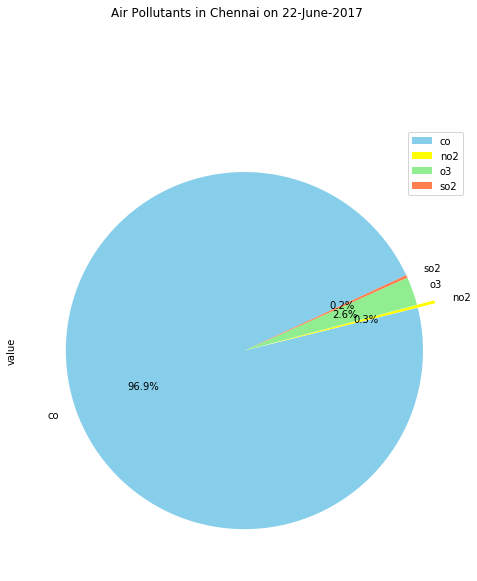

In [20]:
hist_chennai_df = final_historical_df.loc[final_historical_df['City'] == 'Chennai']
hist_chennai_pie= hist_chennai_df.groupby(["Parameter", "Value"])
hist_chennai_mean_plot = hist_chennai_pie.Value.mean()
explode = (0, 0.1, 0, 0)
colors = ['skyblue', 'yellow', 'lightgreen', 'coral']

chennai_mean_plot.plot(kind="pie", 
                       subplots=True, title="Air Pollutants in Chennai on 22-June-2017", autopct="%1.1f%%",
                       figsize=(8,10), startangle=25, explode=explode, legend=True, colors=colors)

plt.savefig("Main_output_images/Chennai_2017_Pi.png")

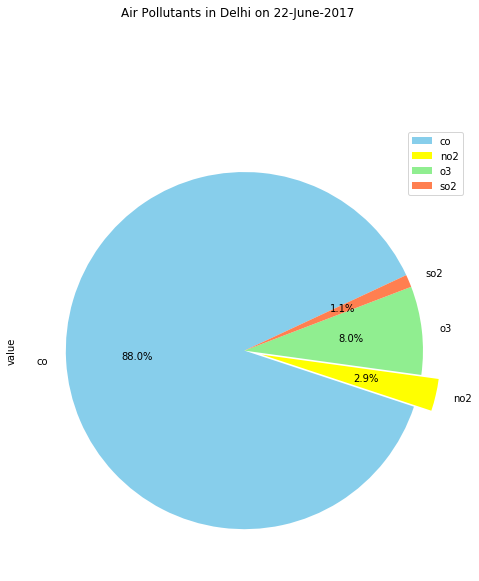

In [21]:
hist_delhi_df = final_historical_df.loc[final_historical_df['City'] == 'Delhi']
hist_delhi_pie= hist_delhi_df.groupby(["Parameter", "Value"])
hist_delhi_mean_plot = hist_delhi_pie.Value.mean()
explode = (0, 0.1, 0, 0)
colors = ['skyblue', 'yellow', 'lightgreen', 'coral']

delhi_mean_plot.plot(kind="pie", subplots=True, title="Air Pollutants in Delhi on 22-June-2017", autopct="%1.1f%%",
                     figsize=(8,10),startangle=25, explode=explode, legend=True, colors=colors)

plt.savefig("Main_output_images/Delhi_2017_Pi.png")

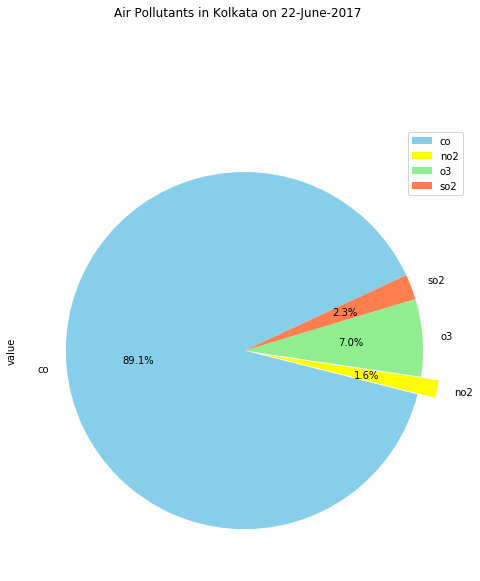

In [22]:
hist_kolkata_df = final_historical_df.loc[final_historical_df['City'] == 'Chennai']
hist_kolkata_pie= hist_kolkata_df.groupby(["Parameter", "Value"])
hist_kolkata_mean_plot = hist_kolkata_pie.Value.mean()
explode = (0, 0.1, 0, 0)
colors = ['skyblue', 'yellow', 'lightgreen', 'coral']

kolkata_mean_plot.plot(kind="pie", subplots=True, title="Air Pollutants in Kolkata on 22-June-2017", autopct="%1.1f%%",
                       figsize=(8,10),startangle=25, explode=explode, legend=True, colors=colors)

plt.savefig("Main_output_images/Kolkata_2017_Pi.png")

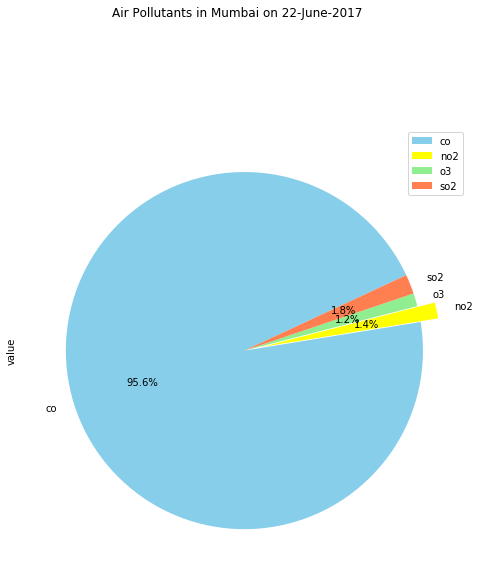

In [23]:
hist_mumbai_df = final_historical_df.loc[final_historical_df['City'] == 'Chennai']
hist_mumbai_pie= hist_mumbai_df.groupby(["Parameter", "Value"])
hist_mumbai_mean_plot = hist_mumbai_pie.Value.mean()
explode = (0, 0.1, 0, 0)
colors = ['skyblue', 'yellow', 'lightgreen', 'coral']

mumbai_mean_plot.plot(kind="pie", subplots=True, title="Air Pollutants in Mumbai on 22-June-2017", autopct="%1.1f%%",
                      figsize=(8,10),startangle=25, explode=explode, legend=True, colors=colors)

plt.savefig("Main_output_images/Mumbai_2017_Pi.png")

Cross Sectional Analysis _ Bar Chart

In [24]:

hist_co = final_historical_df.loc[final_historical_df['Parameter'] == 'co']
# If the data is in a dataframe, we use pandas to give quartile calculations pm25

hist_grouped_cities_co = hist_co.groupby(["City"])


hist_avg_value = hist_grouped_cities_co["Value"].mean()
# avg_value.head()


 
hist_citystats_co_df = pd.DataFrame({"Mean":hist_avg_value})


hist_citystats_co_df.sort_values("City", axis=0, ascending = True)




,Mean
City,
Chennai,460.645161
Delhi,685.087719
Kolkata,607.142857
Mumbai,510.806452


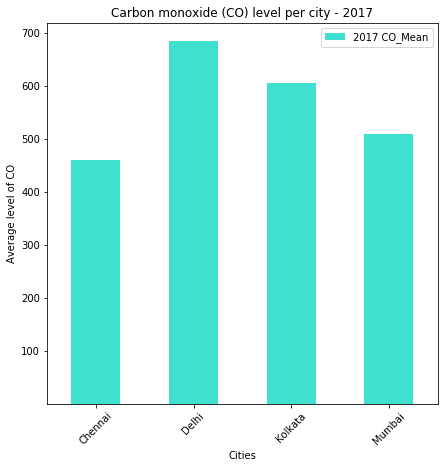

In [30]:
plt.figure(figsize=(7,7))

hist_co_barplot = hist_citystats_co_df["Mean"]
plt.bar(hist_co_barplot.index.values, hist_co_barplot.values, 
        color="turquoise",
        align="center", 
        width = 0.5)

# Set a Title and labels
plt.xlabel("Cities")
plt.xticks(rotation=45)
plt.ylabel("Average level of CO")
plt.title("Carbon monoxide (CO) level per city - 2017")
plt.legend(["2017 CO_Mean"])

# Set x and y limits
plt.xlim(-0.5, 3.5)
plt.ylim(0.5)

plt.savefig("Main_output_images/CO_Mean_Hist2017_barplot.png")